In [8]:
!pip install prophet
!pip install yfinance

In [16]:
# Run 1st

import pandas as pd
import requests
import json
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [17]:
nike_search_terms = ["Nike Air Force 1", "best Nike running shoes for women", "comfortable Nike sandals",
                    "Nike basketball shoes price comparison", "Nike leggings", "Nike sports bra", "Nike tech fleece hoodie", "Nike socks",
                    "Nike gym bag", "best Nike smartwatch features", "Nike Dri-FIT", "Nike leggings for yoga",
                    "Nike shorts", "Nike Air Max", "VaporMax", "Nike Zoom Pegasus", "Nike Golf" ]

for i in nike_search_terms:
    print(i)


df_list_big = []
    
i = 5

while i < 29:
    searches = f'Searches{i}'
    df = pd.read_csv(f'resources/nike_SearchResults/multiTimeline ({i}).csv', skiprows=1, header=None, names=['Month', searches])
    df_list_big.append(df)
    i+=1

In [ ]:
# Run 2nd
ticker_list = ['NKE']  # Example list of tickers


running_shorts_df = pd.read_csv("resources/running_shorts.csv", skiprows=1, header=None, names=['Month', 'Running Shorts'])
tennis_skirt_df = pd.read_csv('resources/tennis_skirt.csv', skiprows=1, header=None, names=['Month', 'Tennis Skirts'])
lulu_lemon_df = pd.read_csv('resources/lululemon.csv', skiprows=1, header=None, names=['Month', 'lululemon Sales'])

# add them all to a list
list_of_dfs = df_list_big

In [18]:
# Run 3rd 
# Clean the dataframes

def clean_dataframes(dfs_list):
    for df in dfs_list:
        df.drop(0, inplace=True)

clean_dataframes(list_of_dfs)

# Display the dataframes

for df in list_of_dfs:
    print(df)

(       Month Running Shorts
 1    2014-01             19
 2    2014-02             22
 3    2014-03             29
 4    2014-04             31
 5    2014-05             38
 ..       ...            ...
 116  2023-08             56
 117  2023-09             42
 118  2023-10             33
 119  2023-11             34
 120  2023-12             29
 
 [120 rows x 2 columns],
        Month Tennis Skirts
 1    2014-01             8
 2    2014-02             8
 3    2014-03            10
 4    2014-04             8
 5    2014-05            10
 ..       ...           ...
 116  2023-08            63
 117  2023-09            55
 118  2023-10            42
 119  2023-11            32
 120  2023-12            26
 
 [120 rows x 2 columns],
        Month lululemon Sales
 1    2014-01              23
 2    2014-02              20
 3    2014-03              22
 4    2014-04              20
 5    2014-05              18
 ..       ...             ...
 116  2023-08              63
 117  2023-09         

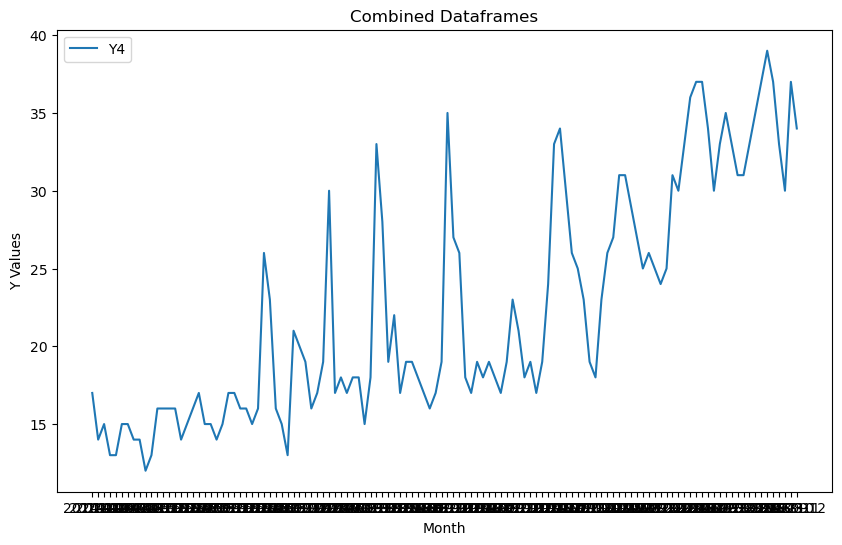

In [19]:
# RUN 4th

def merge_and_plot_dfs(df_list, merge_on='Month', plot=True):
    # Merge all dataframes on the specified column
    merged_df = df_list[0]
    for df in df_list[1:]:
        merged_df = pd.merge(merged_df, df, on=merge_on)

    # Convert relevant columns to numeric, handling non-numeric values
    for col in merged_df.columns:
        if col != merge_on:
            merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

    # Calculate the average
    cols_to_average = [col for col in merged_df.columns if col != merge_on]
    merged_df['Average of Search Terms'] = merged_df[cols_to_average].mean(axis=1)

    return merged_df

merged_df = merge_and_plot_dfs(list_of_dfs)

merged_df

In [ ]:
# Plot that

plt.figure(figsize=(10, 6))  # You can adjust the figure size as needed
plt.plot(merged_df['Month'], merged_df['Average of Search Terms'], label='Average of Search Terms')

# Setting labels and title
plt.xlabel('Month')
plt.ylabel('Average of Search Terms')
plt.title('Average of Search Terms Over Time')

# Optionally, you can format the x-axis to show dates more clearly

# Adding a legend if necessary
plt.legend()

# Show the plot
plt.show()

In [20]:
# Run 5th

stock_and_google_trends_df = merged_df
merged_df = merged_df[['Month', 'Average of Search Terms']]
merged_df

,Month,Running Shorts,Tennis Skirts,lululemon Sales,Carnival Cruises,Y4
0,2014-01,19,8,23,37,17
1,2014-02,22,8,20,29,14
2,2014-03,29,10,22,30,15
3,2014-04,31,8,20,24,13
4,2014-05,38,10,18,26,13
...,...,...,...,...,...,...
115,2023-08,56,63,63,22,37
116,2023-09,42,55,57,20,33
117,2023-10,33,42,61,17,30
118,2023-11,34,32,100,19,37


In [21]:
# Run 6th

import yfinance as yf
import pandas as pd

def get_stock_data(ticker_symbols, start_date='2014-01-01', end_date='2023-01-01'):
    stock_dfs = []

    for ticker_symbol in ticker_symbols:
        # Fetch stock data
        ticker = yf.Ticker(ticker_symbol)
        hist = ticker.history(start=start_date, end=end_date, interval="1mo")

        # Convert to DataFrame and process
        df = pd.DataFrame(hist).reset_index().rename(columns={'Date': 'Month'})

        # Convert 'Month' to datetime format (if not already)
        df['Month'] = pd.to_datetime(df['Month'])

        # Convert 'Month' to period (year-month format) and then to string (object)
        df['Month'] = df['Month'].dt.to_period('M').astype(str)

        # Create a new DataFrame with 'Month' and 'Close'
        close = f'Close {ticker_symbol}'
        stock_df = df[['Month', 'Close']]
        stock_df = stock_df.rename(columns={'Close': close})
        stock_dfs.append(stock_df)

    return stock_dfs

C:\Users\Sean\AppData\Local\Temp\ipykernel_21816\1521881947.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Month'] = df['Month'].dt.to_period('M').astype(str)


dtype('O')

In [ ]:
# Usage

list_of_stock_dfs = get_stock_data(ticker_list)

list_of_stock_dfs

In [ ]:
###############################
merged_stocks = merge_and_plot_dfs(list_of_stock_dfs)

merge_on = 'Month'
columns_to_convert = [col for col in merged_stocks.columns if col != merge_on]

# Apply percent change to each column and multiply by 100 for percentage
for col in columns_to_convert:
    merged_stocks[f'{col} % Change'] = merged_stocks[col].pct_change() * 100

    
columns_to_keep = [merge_on] + [col for col in merged_stocks.columns if '% Change' in col 
                                and col != 'Average of Search Terms % Change']

# Filter the DataFrame to keep only the desired columns
merged_stocks = merged_stocks[columns_to_keep]

cols_to_average = [col for col in merged_stocks.columns if col != merge_on]

merged_stocks['Average of Stocks % chng'] = merged_stocks[cols_to_average].mean(axis=1)
 
merged_stocks = merged_stocks[['Month', 'Average of Stocks % chng']]
merged_stocks.dropna()

In [22]:
# Run 7th
stock_and_google_trends_df = pd.merge(merged_df, merged_stocks, on='Month')
stock_and_google_trends_df

,Month,Running Shorts,Tennis Skirts,lululemon Sales,Carnival Cruises,Y4,Close
0,2014-01,19,8,23,37,17,32.603561
1,2014-02,22,8,20,29,14,32.994572
2,2014-03,29,10,22,30,15,31.696379
3,2014-04,31,8,20,24,13,32.910320
4,2014-05,38,10,18,26,13,33.513103
...,...,...,...,...,...,...,...
115,2023-08,56,63,63,22,37,15.820000
116,2023-09,42,55,57,20,33,13.720000
117,2023-10,33,42,61,17,30,11.460000
118,2023-11,34,32,100,19,37,15.060000


In [23]:
# Run 8th

# Calculate percentage change for 'Stock Price'
#stock_and_google_trends_df['Stock Price % Change'] = stock_and_google_trends_df['Close'].pct_change() * 100

# Calculate percentage change for 'Y4'
stock_and_google_trends_df['Average Search Term % Change'] = stock_and_google_trends_df['Average of Search Terms'].pct_change() * 100
stock_and_google_trends_df.dropna()

,Month,Running Shorts,Tennis Skirts,lululemon Sales,Carnival Cruises,Y4,Close,Stock Price % Change,Y4 % Change
1,2014-02,22,8,20,29,14,32.994572,1.199287,-17.647059
2,2014-03,29,10,22,30,15,31.696379,-3.934565,7.142857
3,2014-04,31,8,20,24,13,32.910320,3.829906,-13.333333
4,2014-05,38,10,18,26,13,33.513103,1.831593,0.000000
5,2014-06,43,14,18,30,15,31.722980,-5.341561,15.384615
...,...,...,...,...,...,...,...,...,...
115,2023-08,56,63,63,22,37,15.820000,-16.029726,-5.128205
116,2023-09,42,55,57,20,33,13.720000,-13.274333,-10.810811
117,2023-10,33,42,61,17,30,11.460000,-16.472305,-9.090909
118,2023-11,34,32,100,19,37,15.060000,31.413616,23.333333


In [ ]:
stock_and_google_trends_df2 = stock_and_google_trends_df[
    stock_and_google_trends_df['Average of Search Terms'] > 49]

new_df = stock_and_google_trends_df2.copy()

# If the 'Month' column contains strings in the 'YYYY-MM' format
new_df['Month'] = new_df['Month'].str[-2:]

frequency = new_df['Month'].value_counts()
frequency

In [24]:
# Run 9th

new_df[['Average Search Term % Change', "Average of Stocks % chng"]].corr()

,Y4 % Change,Stock Price % Change
Y4 % Change,1.000000,0.052282
Stock Price % Change,0.052282,1.000000


<Axes: >

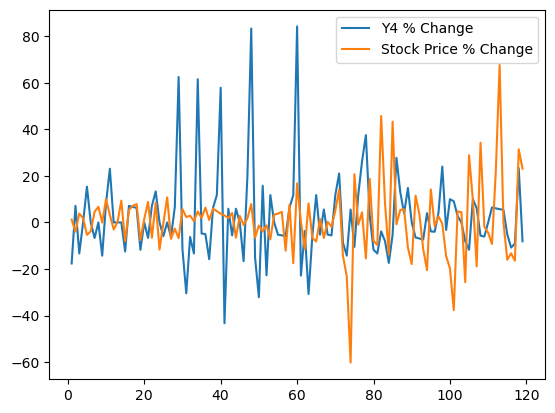

In [25]:
# Run 10th
stock_and_google_trends_df[['Average Search Term % Change', "Average of Stocks % chng"]].plot()

In [ ]:
# Prophet Modeling next

In [26]:
# Prophet looping
from prophet import Prophet
import matplotlib.pyplot as plt

# Model for dfs that go > 100
def logistic_forecast(df):
    # Ensure correct column names
    df.columns = ['ds', 'y']
    df['cap'] = 100
    df['floor'] = 0

    model = Prophet(growth='logistic')
    model.fit(df)

    # Make future dataframe and predict
    future = model.make_future_dataframe(periods=60, freq='M')
    future['cap'] = 100
    future['floor'] = 0
    forecast = model.predict(future)

    # Create and save the plot
    fig = model.plot(forecast)
    plt.close(fig)  # Close the plot to prevent it from displaying immediately

    return {'dataframe': forecast, 'plot': fig}


# Main Function

def df_forecast(df_list):
    results = {}  # Dictionary to store forecasts and plots

    for i, df in enumerate(df_list, start=1):
        # Ensure correct column names
        df.columns = ['ds', 'y']

        # Fit the Prophet model
        m = Prophet()
        m.fit(df)

        # Make future dataframe and predict
        future = m.make_future_dataframe(periods=60, freq='M')
        forecast = m.predict(future)

        # Check if any yhat values are above 100
        if forecast['yhat'].max() > 100:
            # Call logistic forecast function
            result = logistic_forecast(df)
        else:
            # Create and save the plot for non-logistic forecast
            fig = m.plot(forecast)
            plt.close(fig)  # Close the plot to prevent it from displaying immediately
            result = {'dataframe': forecast, 'plot': fig}

        # Store forecast and plot in the dictionary
        results[f'forecast{i}'] = result

    return results

In [27]:
dfs = list_of_dfs 

all_results = df_forecast(dfs)

22:39:41 - cmdstanpy - INFO - Chain [1] start processing
22:39:41 - cmdstanpy - INFO - Chain [1] done processing
22:39:41 - cmdstanpy - INFO - Chain [1] start processing
22:39:41 - cmdstanpy - INFO - Chain [1] done processing
22:39:42 - cmdstanpy - INFO - Chain [1] start processing
22:39:42 - cmdstanpy - INFO - Chain [1] done processing
22:39:42 - cmdstanpy - INFO - Chain [1] start processing
22:39:42 - cmdstanpy - INFO - Chain [1] done processing
22:39:43 - cmdstanpy - INFO - Chain [1] start processing
22:39:43 - cmdstanpy - INFO - Chain [1] done processing


forecast1


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,28.611800,6.030578,22.689686,28.611800,28.611800,-14.242005,-14.242005,-14.242005,-14.242005,-14.242005,-14.242005,0.0,0.0,0.0,14.369795
1,2014-02-01,28.801932,10.343879,26.632062,28.801932,28.801932,-9.979562,-9.979562,-9.979562,-9.979562,-9.979562,-9.979562,0.0,0.0,0.0,18.822369
2,2014-03-01,28.973663,17.986244,34.337207,28.973663,28.973663,-2.687770,-2.687770,-2.687770,-2.687770,-2.687770,-2.687770,0.0,0.0,0.0,26.285894
3,2014-04-01,29.163795,25.160411,42.428730,29.163795,29.163795,4.353169,4.353169,4.353169,4.353169,4.353169,4.353169,0.0,0.0,0.0,33.516964
4,2014-05-01,29.347793,32.783830,49.905124,29.347793,29.347793,12.578785,12.578785,12.578785,12.578785,12.578785,12.578785,0.0,0.0,0.0,41.926578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2028-07-31,40.687355,44.594463,62.419860,39.021685,42.429035,12.930914,12.930914,12.930914,12.930914,12.930914,12.930914,0.0,0.0,0.0,53.618269
176,2028-08-31,40.661931,35.096269,51.798695,38.942824,42.464364,3.100269,3.100269,3.100269,3.100269,3.100269,3.100269,0.0,0.0,0.0,43.762199
177,2028-09-30,40.637327,21.994116,39.452557,38.869182,42.481342,-10.021766,-10.021766,-10.021766,-10.021766,-10.021766,-10.021766,0.0,0.0,0.0,30.615561
178,2028-10-31,40.611903,18.672224,35.473923,38.794011,42.498020,-13.081489,-13.081489,-13.081489,-13.081489,-13.081489,-13.081489,0.0,0.0,0.0,27.530415


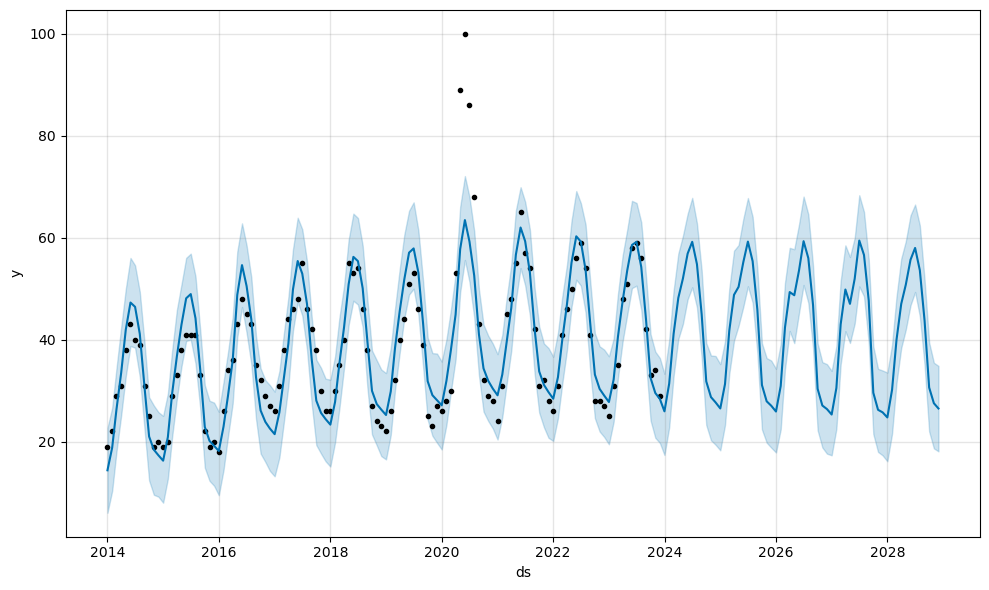

forecast2


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,4.853180,-20.867907,12.560828,4.853180,4.853180,-8.778836,-8.778836,-8.778836,-8.778836,-8.778836,-8.778836,0.0,0.0,0.0,-3.925656
1,2014-02-01,5.228824,-17.611848,14.563372,5.228824,5.228824,-7.020650,-7.020650,-7.020650,-7.020650,-7.020650,-7.020650,0.0,0.0,0.0,-1.791827
2,2014-03-01,5.568115,-12.709738,20.825322,5.568115,5.568115,-1.778866,-1.778866,-1.778866,-1.778866,-1.778866,-1.778866,0.0,0.0,0.0,3.789248
3,2014-04-01,5.943758,-10.455140,22.325340,5.943758,5.943758,0.100014,0.100014,0.100014,0.100014,0.100014,0.100014,0.0,0.0,0.0,6.043773
4,2014-05-01,6.307284,-8.113220,25.345099,6.307284,6.307284,2.750049,2.750049,2.750049,2.750049,2.750049,2.750049,0.0,0.0,0.0,9.057334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2028-07-31,83.187437,79.386570,111.501566,82.346890,83.946936,12.319424,12.319424,12.319424,12.319424,12.319424,12.319424,0.0,0.0,0.0,95.506860
176,2028-08-31,83.671531,75.381811,108.142113,82.817501,84.452745,8.252387,8.252387,8.252387,8.252387,8.252387,8.252387,0.0,0.0,0.0,91.923917
177,2028-09-30,84.140009,67.018787,100.524148,83.269861,84.945714,-0.395666,-0.395666,-0.395666,-0.395666,-0.395666,-0.395666,0.0,0.0,0.0,83.744344
178,2028-10-31,84.624103,57.472300,90.907861,83.732815,85.454887,-10.224928,-10.224928,-10.224928,-10.224928,-10.224928,-10.224928,0.0,0.0,0.0,74.399176


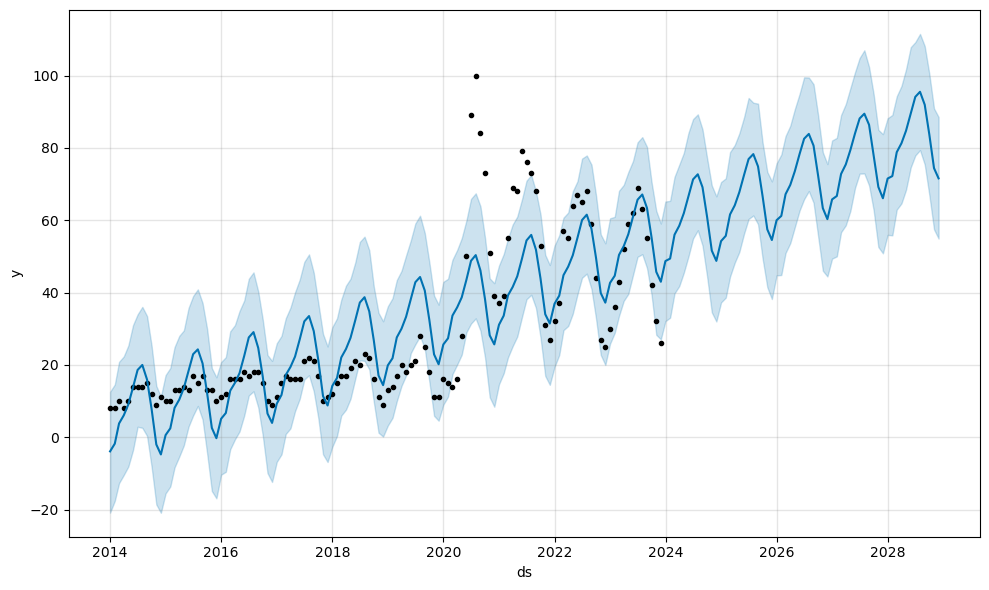

forecast3


,ds,trend,cap,floor,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,9.063237,100,0,3.943754,23.227137,9.063237,9.063237,4.323460,4.323460,4.323460,4.323460,4.323460,4.323460,0.0,0.0,0.0,13.386697
1,2014-02-01,9.258418,100,0,1.289536,19.816627,9.258418,9.258418,1.251460,1.251460,1.251460,1.251460,1.251460,1.251460,0.0,0.0,0.0,10.509878
2,2014-03-01,9.437946,100,0,1.066581,18.967753,9.437946,9.437946,-0.043798,-0.043798,-0.043798,-0.043798,-0.043798,-0.043798,0.0,0.0,0.0,9.394148
3,2014-04-01,9.640341,100,0,0.225938,17.606987,9.640341,9.640341,-0.710601,-0.710601,-0.710601,-0.710601,-0.710601,-0.710601,0.0,0.0,0.0,8.929739
4,2014-05-01,9.839889,100,0,-0.286793,18.719161,9.839889,9.839889,-0.799164,-0.799164,-0.799164,-0.799164,-0.799164,-0.799164,0.0,0.0,0.0,9.040725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2028-07-31,84.873279,100,0,75.278136,94.104352,84.871736,84.874818,-0.294106,-0.294106,-0.294106,-0.294106,-0.294106,-0.294106,0.0,0.0,0.0,84.579173
176,2028-08-31,85.172172,100,0,69.215910,88.344701,85.170600,85.173749,-6.016330,-6.016330,-6.016330,-6.016330,-6.016330,-6.016330,0.0,0.0,0.0,79.155842
177,2028-09-30,85.456762,100,0,75.337085,93.648403,85.455177,85.458355,-0.608201,-0.608201,-0.608201,-0.608201,-0.608201,-0.608201,0.0,0.0,0.0,84.848561
178,2028-10-31,85.746062,100,0,92.051022,111.365529,85.744451,85.747660,16.003349,16.003349,16.003349,16.003349,16.003349,16.003349,0.0,0.0,0.0,101.749411


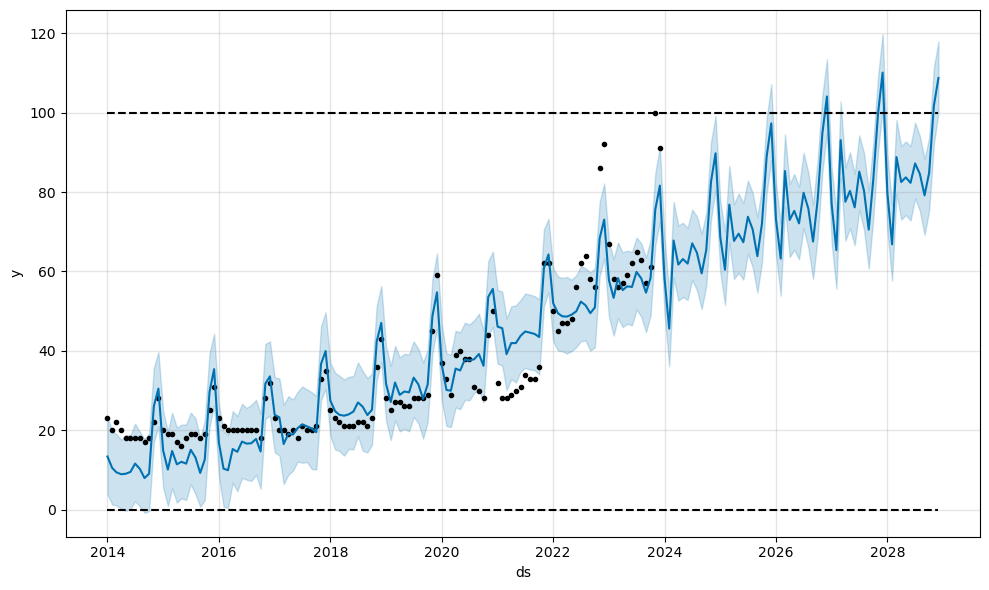

forecast4


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-01-01,36.385600,34.705830,70.609288,36.385600,36.385600,15.801030,15.801030,15.801030,15.801030,15.801030,15.801030,0.0,0.0,0.0,52.186630
1,2014-02-01,36.244608,26.651383,60.143162,36.244608,36.244608,7.351652,7.351652,7.351652,7.351652,7.351652,7.351652,0.0,0.0,0.0,43.596260
2,2014-03-01,36.117260,21.656735,56.663611,36.117260,36.117260,3.700755,3.700755,3.700755,3.700755,3.700755,3.700755,0.0,0.0,0.0,39.818015
3,2014-04-01,35.976268,16.544944,51.647951,35.976268,35.976268,-1.577866,-1.577866,-1.577866,-1.577866,-1.577866,-1.577866,0.0,0.0,0.0,34.398402
4,2014-05-01,35.839824,20.580414,54.917724,35.839824,35.839824,1.527631,1.527631,1.527631,1.527631,1.527631,1.527631,0.0,0.0,0.0,37.367455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,2028-07-31,10.576567,-12.102783,21.741216,10.477983,10.682496,-6.099534,-6.099534,-6.099534,-6.099534,-6.099534,-6.099534,0.0,0.0,0.0,4.477033
176,2028-08-31,10.422840,-14.100467,21.215599,10.322577,10.531803,-6.758413,-6.758413,-6.758413,-6.758413,-6.758413,-6.758413,0.0,0.0,0.0,3.664427
177,2028-09-30,10.274072,-14.684719,20.639841,10.171870,10.385211,-6.812349,-6.812349,-6.812349,-6.812349,-6.812349,-6.812349,0.0,0.0,0.0,3.461724
178,2028-10-31,10.120346,-13.892200,20.932138,10.015709,10.234939,-5.604597,-5.604597,-5.604597,-5.604597,-5.604597,-5.604597,0.0,0.0,0.0,4.515749


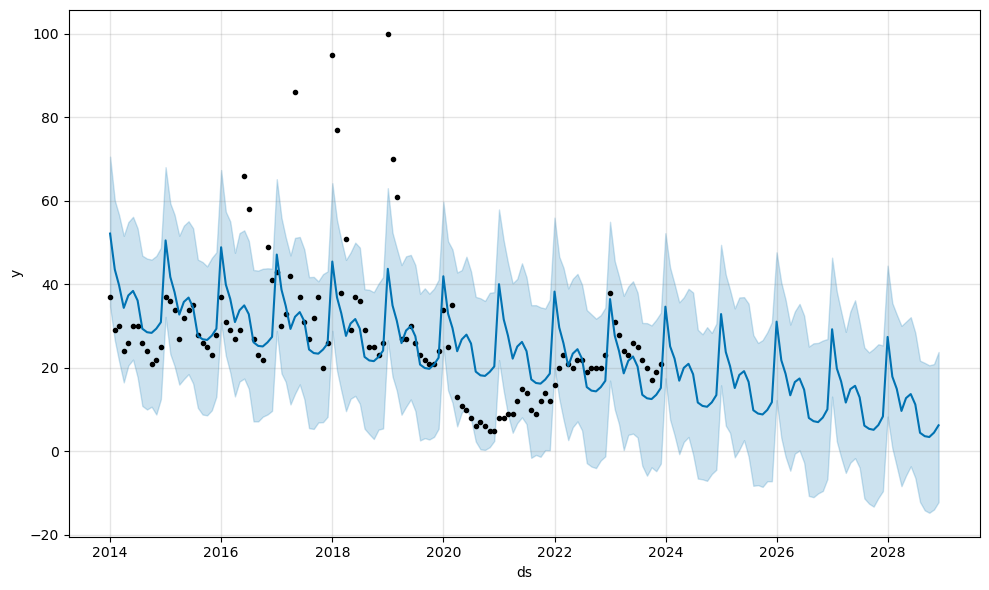

In [28]:
from IPython.display import display

for key, result in all_results.items():
    print(key) 
    # Display the forecast DataFrame
    display(result['dataframe'])
    # Display the plot
    fig = result['plot']
    display(fig)